# Fitguete

## Daten einlesen und Funktionen

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.style
plt.style.use('fivethirtyeight')
#import tikzplotlib
from scipy.optimize import curve_fit

matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'errorbar.capsize': 2})
matplotlib.rcParams.update({'lines.linewidth': 2})
#print(matplotlib.rcParams.keys())
x = np.linspace(0,110,20)


In [135]:
dfref500rpm = pd.read_excel('data/Dicke500rpm_refl.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dfref750rpm = pd.read_excel('data/Dicke750rpm_refl.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dfref1000rpm = pd.read_excel('data/Dicke1000rpm_refl.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dfref2000rpm = pd.read_excel('data/Dicke2000rpm_refl.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dfref3000rpm = pd.read_excel('data/Dicke3000rpm_refl.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dfref4000rpm = pd.read_excel('data/Dicke4000rpm_refl.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dfref5000rpm = pd.read_excel('data/Dicke5000rpm_refl.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dfref6000rpm = pd.read_excel('data/Dicke6000rpm_refl.xls',header = None, names = ['Nr.', 'd/nm', 'f'])

dftrans500rpm =  pd.read_excel('data/Dicke500rpm_trans.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dftrans750rpm =  pd.read_excel('data/Dicke750rpm_trans.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dftrans1000rpm = pd.read_excel('data/Dicke1000rpm_trans.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dftrans2000rpm = pd.read_excel('data/Dicke2000rpm_trans.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dftrans3000rpm = pd.read_excel('data/Dicke3000rpm_trans.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dftrans4000rpm = pd.read_excel('data/Dicke4000rpm_trans.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dftrans5000rpm = pd.read_excel('data/Dicke5000rpm_trans.xls',header = None, names = ['Nr.', 'd/nm', 'f'])
dftrans6000rpm = pd.read_excel('data/Dicke6000rpm_trans.xls',header = None, names = ['Nr.', 'd/nm', 'f'])

dfref1   = pd.read_excel('data/EigeneDaten/Ref1.xlsx')  
dfref25  = pd.read_excel('data/EigeneDaten/Ref25.xlsx')
dfref50  = pd.read_excel('data/EigeneDaten/Ref50.xlsx')
dfref100 = pd.read_excel('data/EigeneDaten/Ref100.xlsx')
dfref200 = pd.read_excel('data/EigeneDaten/Ref200.xlsx')
dfref250 = pd.read_excel('data/EigeneDaten/Ref250.xlsx')
dfref300 = pd.read_excel('data/EigeneDaten/Ref300.xlsx')



dftrans1   = pd.read_excel('data/EigeneDaten/Trans1.xlsx')  
dftrans25  = pd.read_excel('data/EigeneDaten/Trans25.xlsx')
dftrans50  = pd.read_excel('data/EigeneDaten/Trans50.xlsx')
dftrans100 = pd.read_excel('data/EigeneDaten/Trans100.xlsx')
dftrans200 = pd.read_excel('data/EigeneDaten/Trans200.xlsx')
dftrans250 = pd.read_excel('data/EigeneDaten/Trans250.xlsx')
dftrans300 = pd.read_excel('data/EigeneDaten/Trans300.xlsx')

In [136]:
def VarriationundFitDaten(df):
    return np.array([np.std(df.loc[:,'d/nm']), np.mean(df.loc[:,'f']), np.std(df.loc[:,'f'])])
    


## Daten vorbereiten

In [137]:
data_conc_ref = VarriationundFitDaten(dfref1)
data_conc_trans = VarriationundFitDaten(dftrans1)
data_rot_ref = VarriationundFitDaten(dfref500rpm)
data_rot_trans = VarriationundFitDaten(dftrans500rpm)


for i in [dfref25 ,dfref50 ,dfref100,dfref200,dfref250,dfref300]:
    data_conc_ref = np.vstack((data_conc_ref, mittelwert(i)))

for i in [dftrans25 ,dftrans50 ,dftrans100,dftrans200,dftrans250,dftrans300]:
    data_conc_trans = np.vstack((data_conc_trans, mittelwert(i)))

for i in [dfref750rpm , dfref1000rpm, dfref2000rpm, dfref3000rpm, dfref4000rpm, dfref5000rpm, dfref6000rpm]:
    data_rot_ref = np.vstack((data_rot_ref, mittelwert(i)))

for i in [dftrans750rpm , dftrans1000rpm, dftrans2000rpm, dftrans3000rpm, dftrans4000rpm, dftrans5000rpm, dftrans6000rpm]:
    data_rot_trans = np.vstack((data_rot_trans, mittelwert(i)))



## Visulaization


In [138]:
par_conc_ref = np.polyfit(data_conc_ref[:,0],data_conc_ref[:,1],1)
p_conc_ref = np.poly1d(par_conc_ref)

par_conc_trans = np.polyfit(data_conc_trans[:6,0],data_conc_trans[:6,1],1)
p_conc_trans = np.poly1d(par_conc_trans)

par_rot_ref = np.polyfit(data_rot_ref[:,0],data_rot_ref[:,1],1)
p_rot_ref = np.poly1d(par_rot_ref)


par_rot_trans = np.polyfit(data_rot_trans[:,0],data_rot_trans[:,1],1)
p_rot_trans = np.poly1d(par_rot_trans)



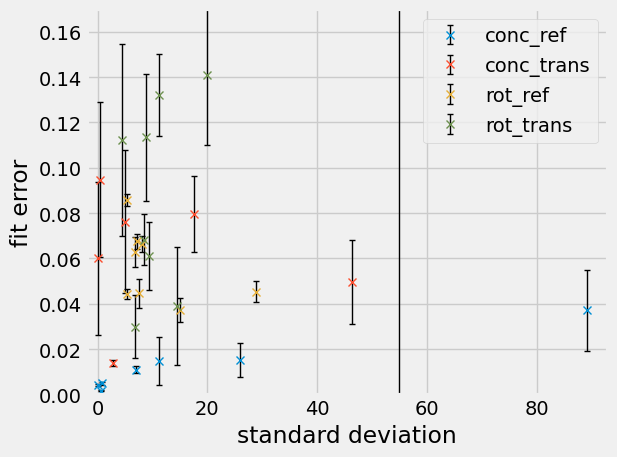

In [151]:
plt.errorbar(data_conc_ref[:,0],data_conc_ref[:,1], yerr= data_conc_ref[:,2],fmt='x',elinewidth = 1, ecolor='black', label  = 'conc_ref')
plt.errorbar(data_conc_trans[:,0],data_conc_trans[:,1], yerr= data_conc_trans[:,2],fmt='x',elinewidth = 1, ecolor='black', label  = 'conc_trans')
plt.errorbar(data_rot_ref[:,0],data_rot_ref[:,1], yerr= data_rot_ref[:,2],fmt='x',elinewidth = 1, ecolor='black', label  = 'rot_ref')
plt.errorbar(data_rot_trans[:,0],data_rot_trans[:,1], yerr= data_rot_trans[:,2],fmt='x',elinewidth = 1, ecolor='black', label  = 'rot_trans')
# plt.plot(x, p_conc_ref(x), color = 'lightblue')
# plt.plot(x, p_conc_trans(x), color = 'r', alpha = 0.3)
# plt.plot(x, p_rot_trans(x), color = 'g', alpha = 0.3)
# plt.plot(x, p_rot_ref(x), color = 'y', alpha = 0.3)

plt.ylim(0,0.17)
plt.xlim(-2,93)


plt.xlabel('standard deviation')
plt.ylabel('fit error')
plt.tight_layout()

plt.legend()

plt.savefig('FitFehlergegenStd.pdf')